# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import visuals as vs
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


In [41]:
# Display a description of the dataset
display(data.describe())
data.dropna()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
5,9413,8259,5126,666,1795,1451
6,12126,3199,6975,480,3140,545
7,7579,4956,9426,1669,3321,2566
8,5963,3648,6192,425,1716,750
9,6006,11093,18881,1159,7425,2098


In [42]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [60,110,180]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,8590,3045,7854,96,4095,225
1,11818,1648,1694,2276,169,1647
2,12356,6036,8887,402,1382,2794


In [43]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
new_data = data.drop(['Delicatessen'], axis = 1)
new_feature = pd.DataFrame(data['Delicatessen'])

# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
X_train, X_test, y_train, y_test = train_test_split(new_data, new_feature, test_size=0.25, random_state=42)

# TODO: Create a decision tree regressor and fit it to the training set
regressor =  DecisionTreeRegressor(random_state=42)
regressor.fit(X_train,y_train)

# TODO: Report the score of the prediction using the testing set
score =  regressor.score(X_test, y_test)
score

-2.254711537203931

In [44]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
new_data = data.drop(['Fresh'], axis = 1)
new_feature = pd.DataFrame(data['Fresh'])

# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
X_train, X_test, y_train, y_test = train_test_split(new_data, new_feature, test_size=0.25, random_state=42)

# TODO: Create a decision tree regressor and fit it to the training set
regressor =  DecisionTreeRegressor(random_state=42)
regressor.fit(X_train,y_train)

# TODO: Report the score of the prediction using the testing set
score =  regressor.score(X_test, y_test)
score

-0.38574971020407384

In [45]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
new_data = data.drop(['Frozen'], axis = 1)
new_feature = pd.DataFrame(data['Frozen'])

# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
X_train, X_test, y_train, y_test = train_test_split(new_data, new_feature, test_size=0.25, random_state=42)

# TODO: Create a decision tree regressor and fit it to the training set
regressor =  DecisionTreeRegressor(random_state=42)
regressor.fit(X_train,y_train)

# TODO: Report the score of the prediction using the testing set
score =  regressor.score(X_test, y_test)
score

-0.21013589012491396

In [46]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
new_data = data.drop(['Milk'], axis = 1)
new_feature = pd.DataFrame(data['Milk'])

# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
X_train, X_test, y_train, y_test = train_test_split(new_data, new_feature, test_size=0.25, random_state=42)

# TODO: Create a decision tree regressor and fit it to the training set
regressor =  DecisionTreeRegressor(random_state=42)
regressor.fit(X_train,y_train)

# TODO: Report the score of the prediction using the testing set
score =  regressor.score(X_test, y_test)
score

0.15627539501732116

In [47]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
new_data = data.drop(['Grocery'], axis = 1)
new_feature = pd.DataFrame(data['Grocery'])

# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
X_train, X_test, y_train, y_test = train_test_split(new_data, new_feature, test_size=0.25, random_state=42)

# TODO: Create a decision tree regressor and fit it to the training set
regressor =  DecisionTreeRegressor(random_state=42)
regressor.fit(X_train,y_train)

# TODO: Report the score of the prediction using the testing set
score =  regressor.score(X_test, y_test)
score

0.6818840085440834

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  


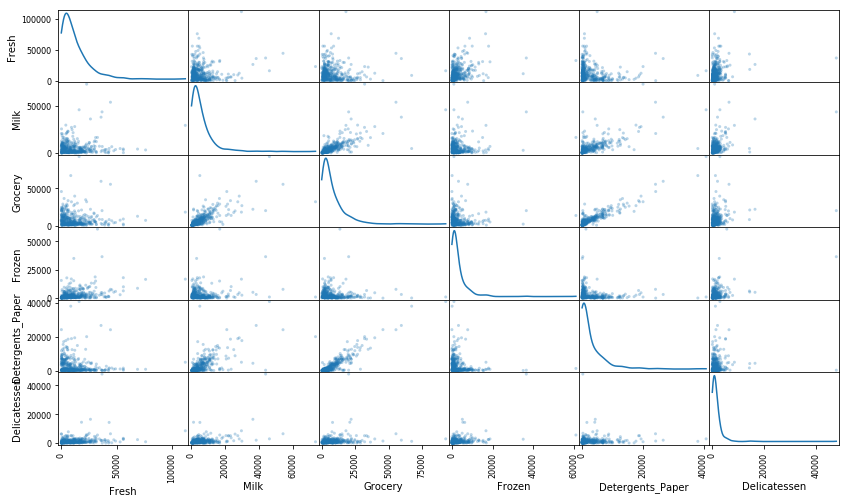

In [48]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

In [49]:
#correlation function for the featgures of the costumers segments csv file
data.corr()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicatessen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


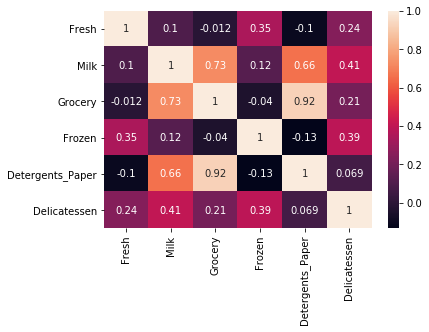

In [50]:
import seaborn as sns
sns.heatmap(data.corr(), annot=True)



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  


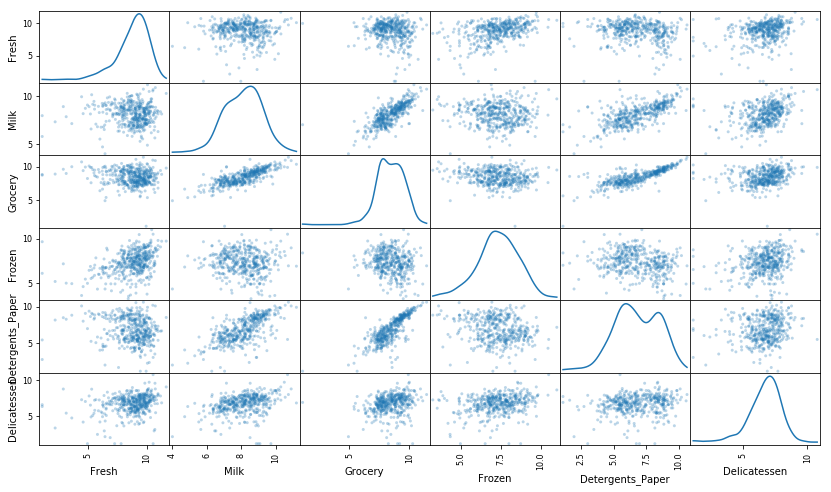

In [51]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

In [52]:
#correlation for the attributes after applyting the log function
log_data.corr()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,-0.019834,-0.132713,0.383996,-0.155871,0.255186
Milk,-0.019834,1.000000,0.758851,-0.055316,0.677942,0.337833
Grocery,-0.132713,0.758851,1.000000,-0.164524,0.796398,0.235728
Frozen,0.383996,-0.055316,-0.164524,1.000000,-0.211576,0.254718
Detergents_Paper,-0.155871,0.677942,0.796398,-0.211576,1.000000,0.166735
Delicatessen,0.255186,0.337833,0.235728,0.254718,0.166735,1.000000


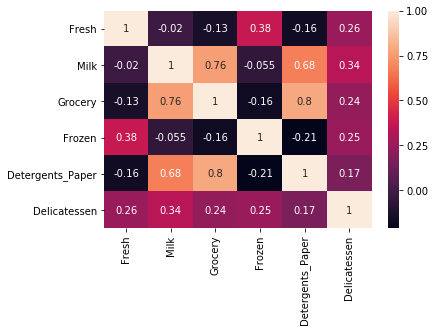

In [53]:
import seaborn as sns
sns.heatmap(log_data.corr(), annot=True)

In [54]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.058354,8.021256,8.968778,4.564348,8.317522,5.416100
1,9.377379,7.407318,7.434848,7.730175,5.129899,7.406711
2,9.421897,8.705497,9.092345,5.996452,7.231287,7.935230


In [55]:
all_outliers = np.array([], dtype='int64')

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3 - Q1) * 1.5
    
    outlier_points = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    all_outliers = np.append(all_outliers, outlier_points.index.values.astype('int64'))
    # Display the outliers
    print ("Data points considered outliers for the feature '{}':".format(feature))
    display(outlier_points)

all_outliers, indices = np.unique(all_outliers, return_inverse=True)
counts = np.bincount(indices)
outliers = all_outliers[counts>1]

print (outliers)

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


[ 65  66  75 128 154]


Dimension 1    0.4430
Dimension 2    0.7068
Dimension 3    0.8299
Dimension 4    0.9311
Dimension 5    0.9796
Dimension 6    1.0000
Name: Explained Variance, dtype: float64


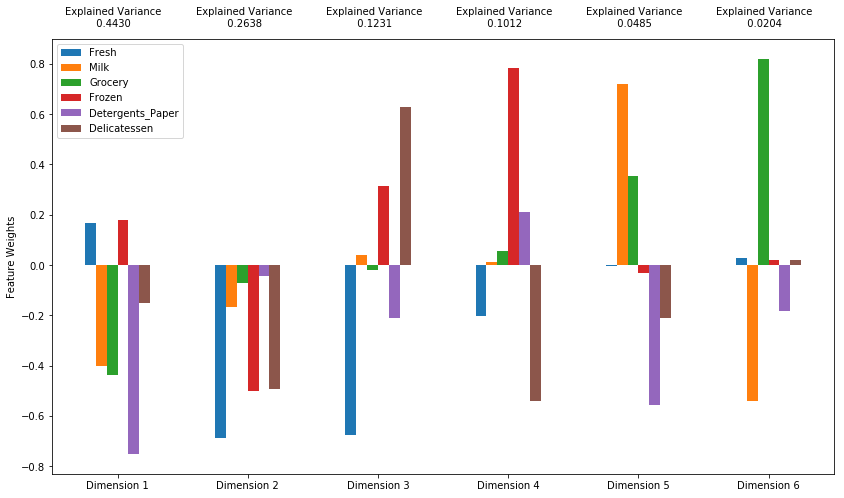

In [56]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
# TODO: Apply PCA to the good data with the same number of dimensions as features
pca = PCA(n_components=6).fit(good_data)

# TODO: Apply a PCA transformation to the sample log-data
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

# display cumulative variance:
print (pca_results['Explained Variance'].cumsum())



In [57]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-1.5723,1.7307,-2.2063,-1.1891,-0.3859,0.1247
1,2.0607,-0.7100,0.5062,-0.6087,-0.1154,-0.1072
2,-1.1464,-0.5574,-0.1630,-1.7168,0.1811,0.1444


In [58]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

In [59]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-1.5723,1.7307
1,2.0607,-0.7100
2,-1.1464,-0.5574


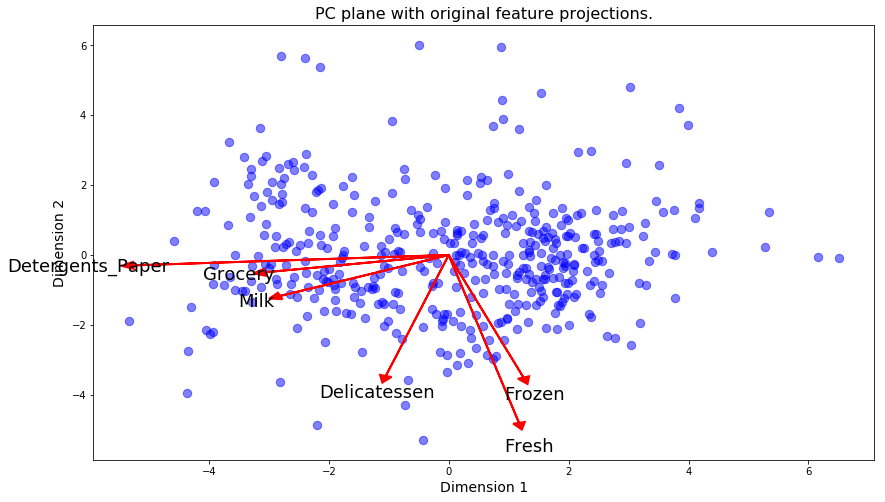

In [60]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

In [69]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.cluster import DBSCAN
# Prepare models
df=reduced_data
kmeans = KMeans(n_clusters=3).fit(df)
normalized_vectors = preprocessing.normalize(df)
normalized_kmeans = KMeans(n_clusters=4).fit(normalized_vectors)
df1=reduced_data1
db = DBSCAN(eps=3.5,min_samples=10 ).fit(good_data)
# Print results
print('kmeans: {}'.format(silhouette_score(df, kmeans.labels_, 
                                           metric='euclidean')))
print('Cosine kmeans:{}'.format(silhouette_score(normalized_vectors,
                                          normalized_kmeans.labels_,
                                          metric='cosine')))
print('DBSCAN: {}'.format(silhouette_score(df, db.labels_, 
                                           metric='cosine')))
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
preds = kmeans.predict(reduced_data)
centers = kmeans.cluster_centers_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)

kmeans: 0.3974234200078325
Cosine kmeans:0.6809331258241361
DBSCAN: -0.08885125845226334
Estimated number of clusters: 1


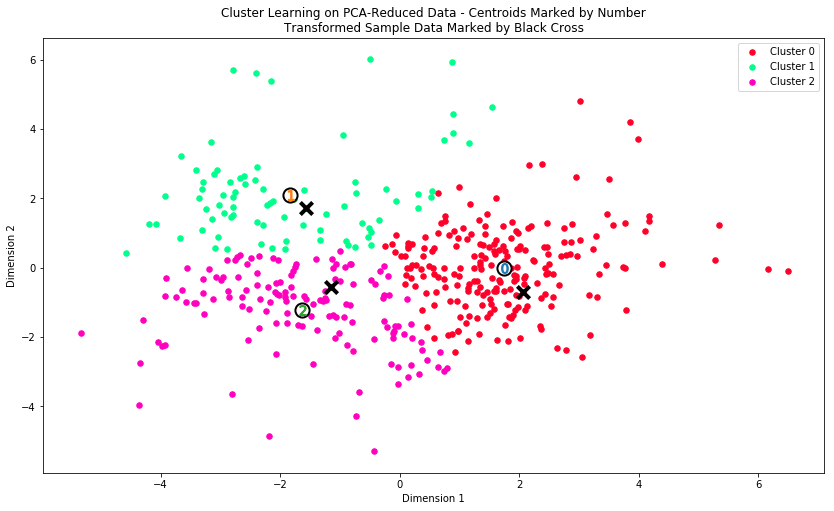

In [70]:
vs.cluster_results(reduced_data, preds, centers, pca_samples)

In [72]:
# K-MEANS
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
reduced_samples = pd.DataFrame(pca_samples, columns = ['Dimension 1', 'Dimension 2'])

# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer = KMeans(n_clusters=2, random_state=29).fit(reduced_data)
# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)
centers = clusterer.cluster_centers_
# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(reduced_samples)
# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, clusterer.labels_, metric='euclidean')
print("KMeans score", score)

KMeans score 0.42628101546910846


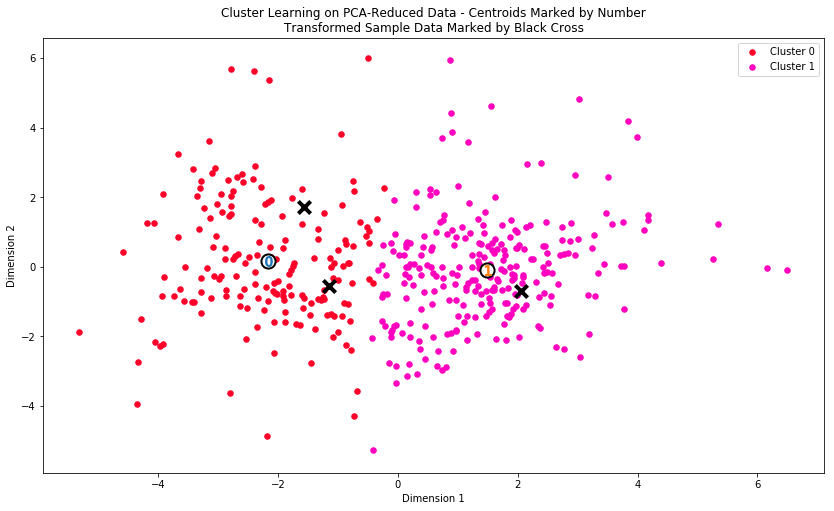

In [73]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

In [74]:

# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,4005.0,7900.0,12104.0,952.0,4561.0,1036.0
Segment 1,8867.0,1897.0,2477.0,2088.0,294.0,681.0



* For each sample point, which customer segment from best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [75]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)
display(true_centers)
display(samples)
display(true_centers-data.median())
display(true_centers-data.mean())

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,4005.0,7900.0,12104.0,952.0,4561.0,1036.0
Segment 1,8867.0,1897.0,2477.0,2088.0,294.0,681.0


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,8590,3045,7854,96,4095,225
1,11818,1648,1694,2276,169,1647
2,12356,6036,8887,402,1382,2794


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,-4499.0,4273.0,7348.5,-574.0,3744.5,70.5
Segment 1,363.0,-1730.0,-2278.5,562.0,-522.5,-284.5


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,-7995.297727,2103.734091,4152.722727,-2119.931818,1679.506818,-488.870455
Segment 1,-3133.297727,-3899.265909,-5474.277273,-983.931818,-2587.493182,-843.870455


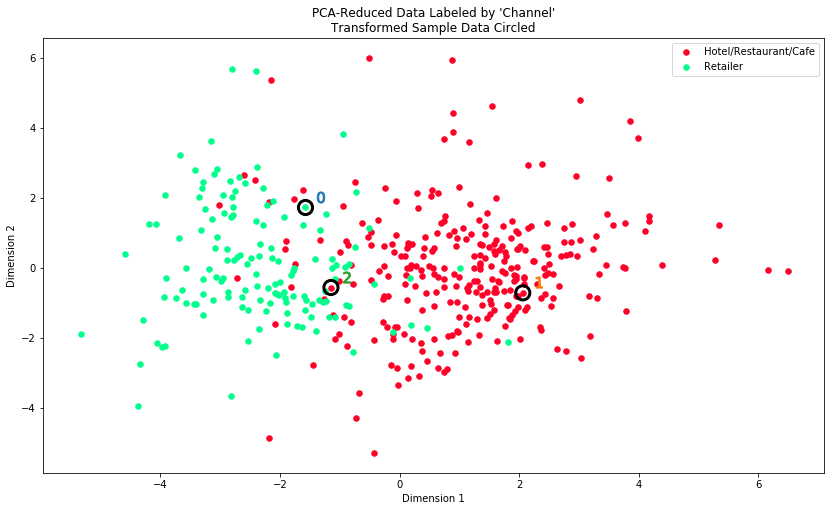

In [76]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

In [77]:
print(preds)

[0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 1 0 1 0 1 1 1 1 0 1
 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 1 0 1
 0 1 0 1 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0 0 1 1 1 0 0 0 0 1 0 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 1 1 0 0 0 1 1 1 1 0 0 0
 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0 1 1 1 1 0
 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0
 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 0
 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1
 1 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1
 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1
 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1]


In [78]:
print(reduced_data.shape)

(435, 2)


In [79]:
good_data["cluster_number"]=preds

In [80]:
good_data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,cluster_number
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931,0
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119,0
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504,0
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853,1
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525,0


In [81]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
new_data = good_data.drop(['cluster_number'], axis = 1)
new_feature = pd.DataFrame(good_data['cluster_number'])
X_train, X_test, y_train, y_test = train_test_split(new_data, new_feature, test_size=0.25, random_state=42)

# TODO: Create a decision tree regressor and fit it to the training set
claaas =  svm.SVC(random_state=42)
claaas.fit(X_train,y_train)

# TODO: Report the score of the prediction using the testing set
score =  claaas.score(X_test, y_test)
score

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9724770642201835

In [82]:
good_data.shape

(435, 7)

In [83]:
preds.shape

(435,)

In [84]:
new_data.shape

(435, 6)

In [85]:
new_feature.shape

(435, 1)

In [86]:
p=claaas.predict(X_test)
p=pd.DataFrame(p)

In [87]:
from sklearn.metrics import accuracy_score 

p1=accuracy_score(p,y_test)

In [88]:
p1

0.9724770642201835

In [89]:
#TODO:Visualize the answers using the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(p,y_test)

array([[44,  1],
       [ 2, 62]], dtype=int64)

In [90]:
from sklearn.metrics import classification_report 
ff=classification_report(p,y_test)
print(ff,end="\n")

             precision    recall  f1-score   support

          0       0.96      0.98      0.97        45
          1       0.98      0.97      0.98        64

avg / total       0.97      0.97      0.97       109



In [91]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
new_data = good_data.drop(['cluster_number'], axis = 1)
new_feature = pd.DataFrame(good_data['cluster_number'])
X_train, X_test, y_train, y_test = train_test_split(new_data, new_feature, test_size=0.25, random_state=42)

# TODO: Create a decision tree regressor and fit it to the training set
claaas =  AdaBoostClassifier(random_state=42)
claaas.fit(X_train,y_train)

# TODO: Report the score of the prediction using the testing set
score =  claaas.score(X_test, y_test)
score

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9724770642201835

In [93]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
new_data = good_data.drop(['cluster_number'], axis = 1)
new_feature = pd.DataFrame(good_data['cluster_number'])
X_train, X_test, y_train, y_test = train_test_split(new_data, new_feature, test_size=0.25, random_state=42)

# TODO: Create a decision tree regressor and fit it to the training set
claaas =  KNeighborsClassifier(n_neighbors=2)
claaas.fit(X_train,y_train)

# TODO: Report the score of the prediction using the testing set
score =  claaas.score(X_test, y_test)
score

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  del sys.path[0]


0.9357798165137615

In [94]:
p=claaas.predict(X_test)
p=pd.DataFrame(p)
from sklearn.metrics import classification_report 
ff=classification_report(p,y_test)
print(ff,end="\n")

             precision    recall  f1-score   support

          0       0.93      0.91      0.92        47
          1       0.94      0.95      0.94        62

avg / total       0.94      0.94      0.94       109

